<a href="https://colab.research.google.com/github/jkjh23/BusanAIDeveloperCourse_AI/blob/master/3_DeepLearning/05_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EB%A5%BC%20%EC%9D%B4%EC%9A%A9%ED%95%9C%20CNN%20%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 연구 목표

- 목표
  - 임계값을 부여해서 정확하게 제시
    - 기존 예측 정확도를 3% 개선해라 등
  - 손글씨 이미지 MNIST(0~9까지의 손글씨 이미지)
    - CNN으로 학습하여, 0~9까지 숫자 이미지가 들어왔을 때, 정확하게 인식(분류)되도록 웹서비스(케라스 버전에서 적용)를 구현하시오
    - 페이지에서 손글씨를 업로드하면, 서버에서 예측 모델이 예측하여 결과를 돌려준다.
  - 평가지표
    - 손실함수를 사용하겠다.(수치)

# 데이터 수집 및 확보
- 제공되는 데이터를 사용

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
tf.__version__

TensorFlow 1.x selected.


'1.15.2'

In [ ]:
# gpu 목록 확인
from tensorflow.python.client import device_lib

In [ ]:
'''
"/device:XLA_GPU:0"이 gpu 사용 시 지정할 이름

만약 GPU를 여러장 쓴다면 아래와 같은 방식이 된다.
"/device:XLA_GPU:0"이 gpu 사용 시 지정할 이름
"/device:XLA_GPU:1"이 gpu 사용 시 지정할 이름
"/device:XLA_GPU:2"이 gpu 사용 시 지정할 이름
'''
for device in device_lib.list_local_devices() :
  print(device)

name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11901787179580796247

name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 18446012547152074491
physical_device_desc: "device: XLA_CPU device"



In [ ]:
# 데이터 획득
mnist = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# 훈련데이터는 mnist[0][0]
# 테스트데이터는 mnist[1][0]
type(mnist), len(mnist), len(mnist[0]), len(mnist[1]), len(mnist[0][0]), len(mnist[1][0])

(tuple, 2, 2, 2, 60000, 10000)

In [ ]:
# 훈련데이터 독립변수(feature, 특성) : 60000건, 28(세로)x28(가로) => (데이터 개수, h, w) 
# 컬러이미지면 (60000, 28, 28, 3)으로 뜬다, 현재 데이터는 그레이스케일(0~255)
# 훈련데이터 종속변수(정답)
mnist[0][0].shape, mnist[0][1].shape

((60000, 28, 28), (60000,))

In [ ]:
mnist[0][0][0]
# 이 데이터의 문제점 : 정규화 처리가 안 되어있음
# 0이면 Black / 255면 White
# shaep 부분을 나눠져 있는 부분 => 좀 더 편한 구조에서 진행하는 것으로, tensorflow에서 사용(2.x에서는 빠졌을 수도 있음)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data

In [ ]:
mnist = input_data.read_data_sets('./data/mnist', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./data/mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./data/mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

In [ ]:
mnist.train.images.shape, mnist.train.labels.shape

((55000, 784), (55000, 10))

In [ ]:
mnist.test.images.shape, mnist.test.labels.shape

((10000, 784), (10000, 10))

In [ ]:
mnist.validation.images.shape, mnist.validation.labels.shape

((5000, 784), (5000, 10))

In [ ]:
mnist.train.labels
# 0 중에 1이 존재하는 인덱스를 찾아라 -> argmax(확률이 높은 값을 가진 위치를 찾을 때도 사용함)
# 정답 데이터는 one-hot 인코딩 처리가 되어있다.

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
mnist.train.images[0]
# 이미지 데이터는 정규화 처리 되어있음

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## 데이터 처리
- 차후 서비스 시 데이터 처리에 대한 규칙
  - 손글씨 이미지를 예측하려면
    - 이미지 자체를 28x28 데이터로 획득해서 픽셀을 255로 나누는 정규화를 수행(MinMaxScaler) -> 예측 -> argmax() -> 결과를 획득

# 데이터 전처리(생략)
- 전처리된 데이터를 받았다.

# 데이터 분석(생략)

# 모델 구축(딥러닝)

- 텐서플로의 제작 스타일을 따라가기 위해
  - 1부 : 인공신경망을 구축, CNN 방식, 기타 학습에 관련된 작업 수행(처음 등장)
  - 2부 : 데이터를 주입, 학습(C++), 예측, 평가

## 1부

- 작업 환경에 대한 수치 정의(환경변수)
- CNN 구조에 따라 망을 설계/구현
- 학습 환경에 대한 최적화 기법, 평가도구 등 정의

### 환경설정값 초기화

In [ ]:
import numpy as np

In [ ]:
# 이미지 1개에 대한 픽셀 수(feature의 수) -> 현 데이터는 784개
PIXEL = mnist.train.images.shape[1]
PIXEL

784

In [ ]:
# 이미지 1개에 대한 세로, 가로 픽셀의 크기 -> 전제 : 정사각형 이미지
PIXEL_H = int(np.sqrt(PIXEL))
PIXEL_W = PIXEL_H 
PIXEL_H, PIXEL_W

(28, 28)

In [ ]:
# 정답 레이블의 개수 -> 데이터가 원-핫 인코딩으로 구성되어 있음을 알고 있다.
LABEL_NUM = mnist.train.labels.shape[-1]
LABEL_NUM

10

In [ ]:
# np.argmax()은 분류값을 처리하는 함수, np.where도 가능한 방법
np.argmax(mnist.train.labels[0]), np.where(mnist.train.labels[0])[0][0]

(7, 7)

In [ ]:
# 정답데이터
label = [n for n in range(10)]
label, label[np.argmax(mnist.train.labels[0])]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 7)

### CNN을 이용한 인공신경망 구축

```
[ 구현할 CNN 구조 ]
- 층 : Layer
  └ 입력층
  └ 은닉층(중간층) : Hidden Layer
    └ 합성곱층     : Convolutional Layer, 특징 추출 목적
    └ 풀링층       : Pooling Layer,       특징 강화 목적
    └ 합성곱층     : Convolutional Layer, 특징 추출 목적
    └ 풀링층       : Pooling Layer,       특징 강화 목적
    └ 전결합층     : 1차원으로 퍼준다,    Fully Connected Layer
  └ 출력층
```

#### 입력층


- x
- 실제 손글씨 데이터가 주입된다(외부에서 데이터를 넣는다). -> 데이터 주입은 2부에서
- PlaceHolder 이용, 외부에서 데이터가 주입될 때 받는 그릇이기 때문에
- 그릇의 shape 필요
  - 훈련데이터 크기는 (55000,784)
  - 테스트 데이터는 (10000, 784)
  - 검증 데이터는 (5000, 784)
  - 그릇의 크기는? (None, 784) => 가변형

In [ ]:
x = tf.placeholder(tf.float32, shape=(None, PIXEL), name='x')
x

<tf.Tensor 'x:0' shape=(?, 784) dtype=float32>

#### 은닉층 > 합성곱층 - 1f

- 목적
  - 이미지 공간상의 정보를 필터를 통과시켜서 특징을 추출하는 층
- 요소
  - 입력 : 합성곱층에 입력되는 값, 이전 층의 출력과 동일 -> x
  - 커널(필터)
    - 정방형 1차 행렬 주로 사용 : (2,2), (3,3), ... (5,5)
    - h, w 동일
  - 가중치(W)
    - 커널이 가지고 있는 값
    - 공용 파라미터로 W를 가진 커널
    - 딥러닝이 학습해서 최적으로 맞춰야할 값 -> 학습이 되면 조정된다
  - 스트라이드(s) 
    - 커널을 이미지 상에서 슬라이딩하는(이동시키는) 크기
    - 커널을 얼마나 이동시킬 것이가?
    - 좌에서 우로 이동 -> 경계를 만나면, 동일 크기로 밑으로 이동 -> 이동이 끝나면 다시 좌에서 우로 이동 -> 반복
    - 좌우 이동량과, 상하 이동량은 통상 동일하게 부여
  - 패딩(p) 
    - 커널을 이동시켜서 특징을 뽑다보면, 끝에 가서 크기가 안 맞는 경우가 생긴다.(경계선 부분에서 크기가 안 맞을 경우) => 어떻게 보정할 것인가?
    - SAME, VALID




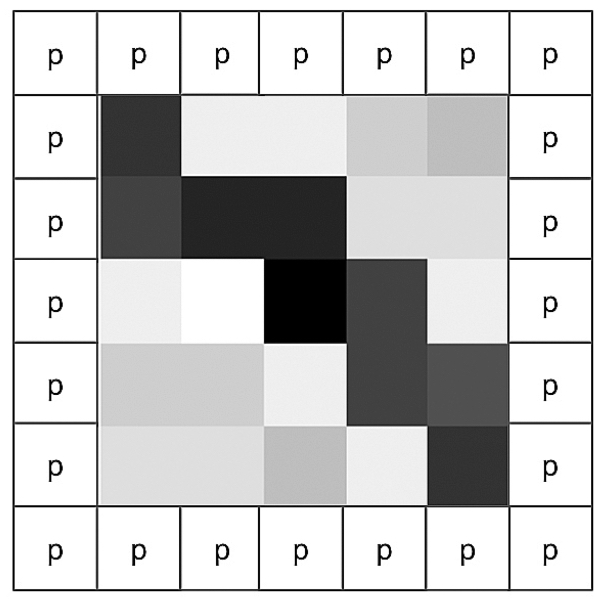

In [41]:
# 패딩
from IPython.display import Image
Image('/content/drive/My Drive/2020_AI_Busan/4_DeepLearning/pic/cnn5.jpeg', width=300)

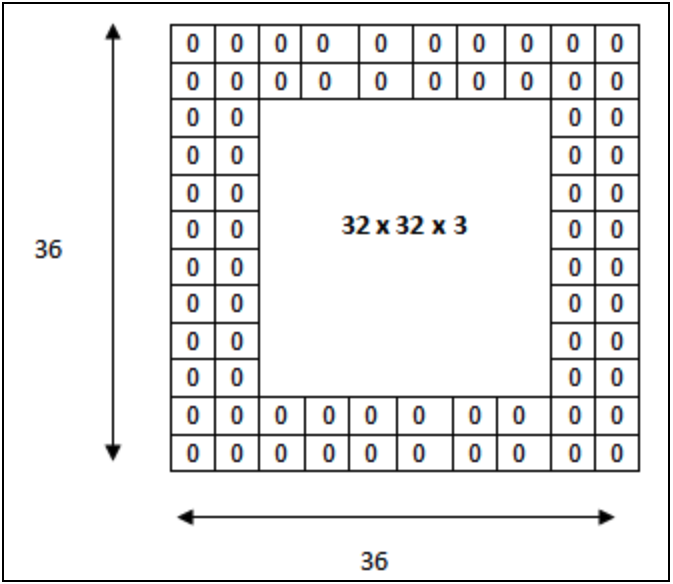

In [43]:
# 패딩
Image('/content/drive/My Drive/2020_AI_Busan/4_DeepLearning/pic/cnn6.png', width=300)

# p값은 동일하게 적용되고, 일반적으로 0을 적용
# 이것은 곧 경계선 검출과 연관성을 가진다.



  - 출력 : feature map 혹은 activation map(활성화맵 : 특성맵을 특정 활성화함수로 통과시킨 결과물)

- 최종식
  - 퍼셉트론을 기본으로 설정
  - y = x * W + b(편향값)
    - x : (None, 784)
    - W : (3,3) -> 일종의 설정
      - 스트라이드(s)값이 필요함, 몇 개를 출력할 것인지 크기 또한 필요함, 1개의 이미지를 넣어서 몇 개의 특징을 가진 이미지로 뽑아낼 것인가? 예 : 32
    - b : 32
      - 편향값은 무조건 x*W의 출력채널 수를 따라간다.

In [ ]:
# 공용 파라미터로 W를 가진 필터를 생성하는 함수
# W는 최적화를 통해서 조정되므로, 변수가 되야한다.
# 단, 초기값은 상수로 제공 가능
# shape : 커널의 shape
# name : W의 이름, 텐서보드에서 확인할 수 있다.(구분용)
def make_WeightFilter(shape, name) :
  # W의 초기값(랜덤 혹은 개발한 값(수직, 수평, 가우시안 등) 혹은 일반적인 함수(값의 분포를 표현한 함수))
  # stddev=0.1은 설정값
  # shape => [ 커널의 세로 크기(가로크기 넣어도 OK ∵ 이미지가 아니라 세로부터 이야기할 필요 X), 커널의 가로 크기, 입력 채널 수, 출력 채널 수 ]
  # 커널의 가로/세로 크기 : 동일값으로 지정한다. 3 혹은 5
  # 입력 채널 수 : 학습 시 주입되는 데이터의 채널 수 -> 1(만약 컬러면 3)
  # 출력 채널 수 : 1장의 이미지에서 몇 개의 특징을 뽑을 것인가, 설계할 때 설정
  #                만약 32이라고 지정하면, 1장의 이미지에서 특징을 뽑아서 이미지를 만들어내는 과정을 32번 수행한다.
  #                따라서 1장의 이미지가 32장이 된다.(W가 조정되면서 특징을 다양하게 매번 뽑는 것)
  tmp = tf.truncated_normal(shape, stddev=0.1)
  # 커널(필터)은 상수? 변수? 플레이스홀더? => 어떤 형식을 쓸지부터 결정해야 한다.
  # 텐서보드라는 시각화 도구에서 W를 구분해낼 때 "W_name"으로 찾을 수 있다.
  W = tf.Variable(initial_value=tmp, name="W_"+name)
  return W

In [ ]:
# 편향값을 생성하는 함수
def make_Bais(shape, value, name) :
  # shape은 xW + b에서 b에 해당되고, 1D-tensor
  # 상수로 초기값을 부여하겠다.
  tmp = tf.constant(value, shape=[shape])
  # b는 변수이므로 차후 최적화를 통해서 미세 조정된다.
  b = tf.Variable(tmp, name="b_"+name)
  return b

In [ ]:
# 합성곱층을 생성하는 함수
def make_Conv_2d(x, W, name) :
  conv2d = tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME', name='conv_'+name)
  '''
  input   : 이전 층의 출력이 여기서는 입력이 된다.
            [
              batch,      : 1회 훈련 시 주입되는 데이터의 총 수 -> batch_size
              in_height,  : 이미지의 세로 크기
              in_width,   : 이미지의 가로 크기
              in_channels : 이미지의 입력 채널 수(그레이스케일 : 1, 컬러 : 3)
            ]
            4-D tensor, data_format 중 한가지 형태를 취한 것(다른 타입은 케라스 혹은 파이토치에서 확인)
  filter  : 가중치 값을 파라미터로 가진 커널(필터)
            [
              filter_height, : 커널(필터)의 세로 크기 ex) 3 or 5
              filter_width,  : 커널(필터)의 가로 크기 ex) 3 or 5
              in_channels,   : 입력 채널 수 ex) 1
              out_channels   : 출력 채널 수 ex) 32(설정값)
            ]
  strides : 커널의 이동량
            [
              batch, : batch와 depth는 동일값을 사용, 1을 사용한다. ex) 1
              W,     : W와 h는 통상 같은 값을 사용 ex) 1, 2, ...
              h,     : W와 h는 통상 같은 값을 사용 ex) 1, 2, ...
              depth  : batch와 depth는 동일값을 사용, 1을 사용한다. ex) 1
            ]
  padding : 커널이 이동해서 특징을 추출할 때, 입력 이미지의 크기가 안 맞는 경우 보정하는 방식
            SAME  : 만약 stride가 1이면 출력 채널을 통해 나오는 특징맵 이미지는 원본 이미지와 동일 크기를 가진다.
            VALID : 원본이미지 대비 크기가 줄어든다.
  '''
  return conv2d

In [ ]:
# 전과정을 연결해서 만드는 실질적인 합성곱층 생성(함수 또는 모듈)

# 텐서보드에서 그래프(관계)를 확인하기 위해서 scope(범위)를 묶는다.
layer_name = 'conv_1f'
with tf.name_scope(layer_name) as scope :
  # y = x * W + b : 퍼셉트론에 입각해서 식 성립
  # ---------------------------------------------------------------------------------------------------------------------------------
  # 1. 공용 파라미터로 W를 가지는 필터(커널) 생성
  #    커널 크기 : 5*5, 입력 채널 수 : 1, 출력 채널 수 : 32(1장의 이미지에서 특징을 뽑아 1개를 출력하는 행위를 32번 수행한다.)
  conv1_W = make_WeightFilter([5,5,1,32], layer_name)
  # ---------------------------------------------------------------------------------------------------------------------------------
  # 2. 편향 bias 생성
  #    W의 마지막 요소값과 일치하게 shape을 잡는다.
  #    행렬의 합에 의해서 W의 마지막 32가 b의 크기가 된다.(동일하게)
  #    브로드캐스팅이라는 지원요소가 행렬의 합 과정에서 반영되어 연산되게 처리한다.
  #    value=0.1은 임의로 부여한 초기값 -> 차후에 최초 시작값을 조정할 수 있다.
  conv1_b = make_Bais(32, 0.1, layer_name)
  # ---------------------------------------------------------------------------------------------------------------------------------
  # 3. x(입력값) 준비
  #    입력값 조정 -> 합성곱을 만드는 API가 있다. 이 API가 요구하는 입력 형식 => (batch : 데이터 개수, h, w, 입력 채널 수) 
  #    입력 채널 수 => 그레이 스케일 : 1 / 컬러 : RGB로 구성되어 3
  #    데이터를 표현하는 포맷 중에 하나(포맷은 총 2개 존재, 텐서플로가 이 형식을 지원, 나머지는 파이토치할 때 등장)
  #    x는 (None, 784)에서 (-1, 28, 28, 1) 형식으로 바꿔야 한다.
  #    2D를 4D로 구성 => reshape
  x_4d = tf.reshape( x, (-1, PIXEL_H, PIXEL_W, 1) )
  # ---------------------------------------------------------------------------------------------------------------------------------
  # 4. 합성곱층 생성 -> feature map을 산출물로 생성한다.
  #    y = x * W + b
  conv1 = make_Conv_2d(x_4d, conv1_W, layer_name) + conv1_b
  # ---------------------------------------------------------------------------------------------------------------------------------
  # 5. 활성화 함수 통과 -> activation map으로 산출물을 생성한다. -> 만드는 사람이 설정 
  #    활성화 함수를 통과시키면 데이터가 전체적으로 특정 컨셉으로 보정된다.
  #    (데이터를 비선형으로 흩뜨려놓는다고 이해하면 됨, 깊이를 더 주기 위해)
  act_conv1 = tf.nn.relu(conv1)

# padding = 'SAME'일 때,  <tf.Tensor 'conv_1f_4/Relu:0' shape=(?, 28, 28, 32) dtype=float32>
# padding = 'VALID'일 때, <tf.Tensor 'conv_1f_4/Relu:0' shape=(?, 24, 24, 32) dtype=float32>
act_conv1

<tf.Tensor 'conv_1f/Relu:0' shape=(?, 28, 28, 32) dtype=float32>

#### 은닉층 > 풀링층 - 1f

- 구성요소
  - 입력 
    - 합성곱층의 산출물(결과물) => fature map 혹은 activation map
    - <tf.Tensor 'conv_1f/Relu:0' shape=(?, 28, 28, 32) dtype=float32>
  - W : 필요 없음, 단, 필터의 크기는 필요함
  - b : 필요 없음
  - s : 필터의 이동량
  - p : same/valid
- 목적
  - 특징을 강화한다.
    - 최대 풀링, 평균 풀링, 최소 풀링 등

In [ ]:
# 최대 풀링 처리 함수
def make_MaxPooling(x) : 
  # 2x2 커널이 2칸씩 이동하는데 보정값이 SAME이면 이미지의 크기는 정확히 1/2로 줄어든다.
  # 커널 크기와 스트라이드, 패딩을 고정하겠다.
  pool = tf.nn.max_pool(value=x, ksize=[1,2,2,1], strides=[1,2,2,1], padding="SAME")
  '''
  value              : 4-D, [batch, h, w, in_channels]
  ksize              : [1,2,2,1] => 커널 크기는 (2,2), W의 값은 없다
                       [batch, h, w, in_channels]
  strides            : [1,2,2,1] => 이동량이 2칸씩
  padding            : SAME, VALID
  data_format='NHWC' : [데이터 개수, 이미지 높이, 이미지 가로, 채널 수]
                       이런 형식으로 value(입력)가 와야 한다.
                       <-> 'HWNC' format : [이미지 높이, 이미지 가로, 데이터 개수, 채널 수]
  '''
  return pool

In [ ]:
# 풀링 처리
layer_name = "pooling_1f"
with tf.name_scope(layer_name) as scope :
  pool1 = make_MaxPooling(act_conv1)
pool1
# (?, 14, 14, 32) => 이미지 크기가 줄어들었다. 픽셀 4개가 1개의 최대값으로 줄어들었다(압축되었다, 특성이 최대값으로 강화되었다).
# 이미지의 개수는? => 변화 없다.

<tf.Tensor 'pooling_1f/MaxPool:0' shape=(?, 14, 14, 32) dtype=float32>

#### 은닉층 > 합성곱층 - 2f

- 입력 : pool1
  - shape : (?, 14, 14, 32) (<tf.Tensor 'pooling_1f/MaxPool:0' shape=(?, 14, 14, 32) dtype=float32>)
- 출력 : act_conv2
  - 출력 채널 수를 32*2개로 늘리겠다(설정)
  - shape : (?, 14, 14, 32*2)

In [ ]:
layer_name = 'conv_2f'
with tf.name_scope(layer_name) as scope :
  conv2_W   = make_WeightFilter([5,5,32,32*2], layer_name)
  conv2_b   = make_Bais(32*2, 0.1, layer_name)
  conv2     = make_Conv_2d(pool1, conv2_W, layer_name) + conv2_b
  act_conv2 = tf.nn.relu(conv2)
act_conv2

<tf.Tensor 'conv_2f/Relu:0' shape=(?, 14, 14, 64) dtype=float32>

#### 은닉층 > 풀링층 - 2f

- 입력 : act_conv2
  - shape : (?, 14, 14, 32*2)
- 출력 : pool2
  - 만약 동일한 커널, 스트라이드, 패딩을 적용하면 shape은 (?, 7, 7, 32*2)


In [ ]:
layer_name = "pooling_2f"
with tf.name_scope(layer_name) as scope :
  pool2 = make_MaxPooling(act_conv2)
pool2

<tf.Tensor 'pooling_2f/MaxPool:0' shape=(?, 7, 7, 64) dtype=float32>

#### 은닉층 > 전결합층

- 출력층으로 가는 마지막 단계
- Flattern 처리를 해서, 2D-Tensor로 수렴(=> 펴준다)
- 입력 : pool2(?, 7, 7, 64)
- 출력 : fc(FullConnectedLayer)
- shape : (?, 1024) => 설정값, 3136개(7x7x64)의 피쳐를 1024개로 수렴



In [ ]:
layer_name = "fc"
with tf.name_scope(layer_name) as scope :
  # pool2의 shape을 구해서 계산(현재는 값을 차용)
  in_channels = 7 * 7 * 64
  # W
  # 1024는 설정값
  fc_W = make_WeightFilter([in_channels, 1024], layer_name)
  # b
  # 브로드캐스팅에 의해서 행렬의 합이 처리된다.
  fc_b = make_Bais( 1024, 0.1, layer_name )
  # 4D -> 2D
  tmp_x = tf.reshape(pool2, [-1, in_channels])
  # 식 y = xW + b
  # fc의 shape은 (?, 1024)로 나와야함 -> (-1, in_channels) (in_channels) => (?, 1024)
  fc = tf.matmul(tmp_x, fc_W) + fc_b
  # 활성화 함수
  act_fc = tf.nn.relu(fc)
act_fc

<tf.Tensor 'fc/Relu:0' shape=(?, 1024) dtype=float32>

#### 드롭아웃층
- 해당 층은 어디서든지 개입이 가능
- 과(잉)적합 혹은 overfit 방지
- 특정 데이터 모델에 길들여지는, 즉 편향성을 가지는 것을 방지
- 입력 
  - act_fc
  - shape : (?, 1024)
- 출력
  - fc_dropout
  - shape : (?, 1024)

In [ ]:
layer_name = "fc_dropout"
with tf.name_scope(layer_name) as scope :
  # keep_prob : 특정 비율만큼 신경을 죽여서(학습을 방해) 과적합 방지
  # keep_prob를 외부에서 입력 받아서 조절한다면? => placeholder
  keep_prob = tf.placeholder(tf.float32)
  fc_dropout = tf.nn.dropout(act_fc, rate=1-keep_prob)
fc_dropout

<tf.Tensor 'fc_dropout/dropout/mul_1:0' shape=(?, 1024) dtype=float32>

#### 출력층


- 이전 단계의 산출물 (?, 1024)을 최종 레이블(정답)의 shape으로 수렴한다
- 입력 
  - fc_dropout
  - (?, 1024)
- 출력
  - y_conv
  - (?, 10)
- 활성화 함수
  - softmax() : 확률로 표현
    - softmax를 통과한 데이터 1개를 추출해서 그 구성원(10개)을 다 합치면 무조건 1.0
    - 그 중에서 가장 확률값이 높은 구성원의 인덱스를 구해서(argmax) 정답표에 대입하여 정답을 구한다.

In [ ]:
layer_name = "output"
with tf.name_scope(layer_name) as scope :
  # x의 shape은 (?, 1024)
  # W의 shape은 (1024, 10)
  y_W = make_WeightFilter([int(fc_dropout.shape[-1]), LABEL_NUM], layer_name)
  y_b = make_Bais(LABEL_NUM, 0.1, layer_name)
  # y = x * W + b
  y_conv = tf.matmul(fc_dropout, y_W) + y_b
  y_conv = tf.nn.softmax(y_conv)
y_conv

<tf.Tensor 'output/Softmax:0' shape=(?, 10) dtype=float32>

- x -> ... -> y_conv 신경망 연결되었다. 데이터 플로우 그래프가 완성되었다.

### 학습, 최적화, 평가 등 플로우 구성

```
학습 관련 플로우
- 크로스 엔트로피, 손실함수
- 경사하강법, 최적화(나중에 오차역전파도 추가 가능)
- 위와 관련된 내용을 연결하여 플로우를 구성 -> train(변수명)이라고 정의한다.
```

#### 정답 주입 준비
- 정답을 외부에서 받을 placeholder 준비
- 정답이 있어야 평가가 수행되고, 오차율도 계산됨
- 오차율이 있어야 손실함수를 작동할 수 있음
- 손실함수가 있어야 최적화가 가능함
- 외부에서 정답(훈련 데이터에 대한)을 주입해주어야 함

In [ ]:
y_ = tf.placeholder(tf.float32, shape=(None, LABEL_NUM), name='y_')
y_

<tf.Tensor 'y_:0' shape=(?, 10) dtype=float32>

#### 데이터 정리
- 외부에서 주입 받을 데이터 정리
- x
  - 훈련 데이터
- keep_prob
  - 과적합 방지를 위한 학습 방해율
  - 0.0 ~ 1.0
- y_
  - 훈련 데이터의 실제 정답

#### 손실함수
- 성능 평가의 지표로 손실함수를 이용하여 체크를 할 것
- 손실함수를 계산하는 방법 중 크로스 엔트로피 사용



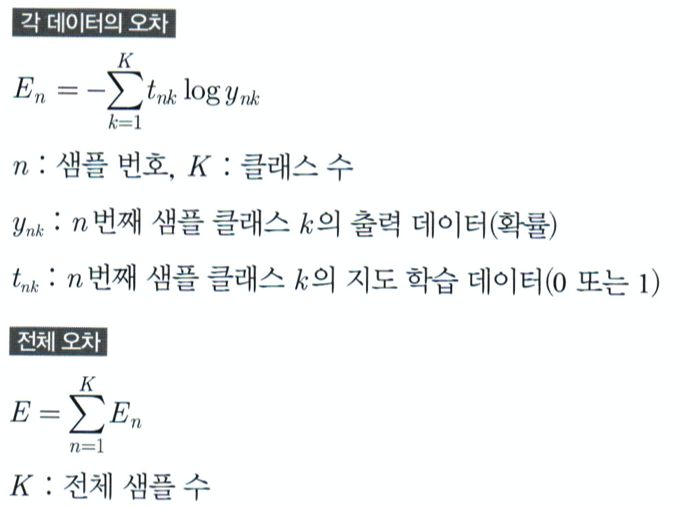

In [45]:
Image('/content/drive/My Drive/2020_AI_Busan/4_DeepLearning/pic/크로스엔트로피계산.png', width=400)

In [ ]:
layer_name = "loss"
with tf.name_scope(layer_name) as scope :
  cross_entropy = -tf.reduce_sum(y_ * tf.log(y_conv))
# 1개의 값으로 나온다 -> 이 값이 0에 가까울수록 성능이 향상된다.
cross_entropy

<tf.Tensor 'loss/Neg:0' shape=() dtype=float32>

#### 최적화
- 학습계수(W, b) 조정 알고리즘
- 알고리즘 : 경사 하강법(SGD), Adam, AdaGrid, FMSProp, Momentum, ...
- 목적 : 손실값을 최소로 줄이는 방향으로 값(W, b)을 조정해가면서, 최적화를 수행

In [ ]:
layer_name = "adam"
with tf.name_scope(layer_name) as scope :
  # 최적화 도구 생성
  optimizer = tf.train.AdamOptimizer()
  # 손실함수를 최소로 나오게끔 조정
  train = optimizer.minimize(cross_entropy)
train

<tf.Operation 'adam/Adam' type=NoOp>

#### 예측 및 평가


In [ ]:
layer_name = "predict"
with tf.name_scope(layer_name) as scope :
  # 예측 : 같으면 T(1), 틀리면 F(0)
  predict = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
  # 정확도 = T의 총합(총개수) / 예측의 총개수 * 100
  accuracy = tf.reduce_mean(tf.cast(predict, tf.float32))
accuracy

<tf.Tensor 'predict/Mean:0' shape=() dtype=float32>

## 2부

```
- 학습 수행
- 손실함수 획득, 정확도 획득
- 학습계수 미세 조정(W, b)
- 다시 학습 수행
- ...
- 특정 학습 수행 횟수가 종료되면 학습 종료
```



- 세션 오픈
- 데이터 주입
- 학습
- 예측
- 평가

In [ ]:
# 학습 시, 테스트 시 주입할 데이터를 만드는 함수
# 작성된 코드 중에 placeholder만 찾아서 만들면 됨 
def make_FeedDictParam(featureDatas, labels, prob) :
  return {
            x         : featureDatas,
            keep_prob : prob,
            y_        : labels
          }

In [ ]:
import time
start_time = time.time()
# GPU를 이용한 학습
with tf.device('/device:GPU:0') :
  with tf.Session() as sess :
    TRAIN_COUNT = 3000 
    BATCH_SIZE = 50
    VERBOSE_TERM = 100
    sess.run(tf.global_variables_initializer())
    test_fd = make_FeedDictParam(mnist.test.images, mnist.test.labels, 1.0)
    for step in range(TRAIN_COUNT) :
      batch = mnist.train.next_batch(BATCH_SIZE)
      train_fd = make_FeedDictParam(batch[0], batch[1], 0.5)
      _, loss = sess.run( [train, cross_entropy], feed_dict=train_fd )
      if step % VERBOSE_TERM == 0 :
        acc = sess.run(accuracy, feed_dict=test_fd)
        print(f'step={step:<4} acc={acc:<20}  loss={loss:<20}')
    acc = sess.run(accuracy, feed_dict=test_fd)
    print(f'step={step:<4} acc={acc:<20}  loss={loss:<20}')
train_time = time.time() - start_time
print(train_time, train_time/60)

step=0    acc=0.11999999731779099   loss=602.212158203125    
step=100  acc=0.944599986076355     loss=22.799528121948242  
step=200  acc=0.9666000008583069    loss=13.022672653198242  
step=300  acc=0.9725000262260437    loss=6.609230041503906   
step=400  acc=0.9703999757766724    loss=5.9001007080078125  
step=500  acc=0.9785000085830688    loss=1.076359748840332   
step=600  acc=0.9768999814987183    loss=5.405210971832275   
step=700  acc=0.9832000136375427    loss=2.505998373031616   
step=800  acc=0.9828000068664551    loss=8.466532707214355   
step=900  acc=0.9847999811172485    loss=1.4128525257110596  
step=1000 acc=0.9822999835014343    loss=2.017906427383423   
step=1100 acc=0.9861000180244446    loss=2.5699799060821533  
step=1200 acc=0.9857000112533569    loss=1.6150063276290894  
step=1300 acc=0.984000027179718     loss=13.149178504943848  
step=1400 acc=0.9860000014305115    loss=10.580198287963867  
step=1500 acc=0.9869999885559082    loss=1.2430216073989868  
step=160

- CPU : 680s
- GPU : 25s

In [ ]:
aa # 연속 실행 시 강제로 오류 발생

In [ ]:
# 학습
# 1. 시간 측정 => GPU 사용 대비 시간이 얼마나 단축됐는지 체크
import time
# 시작 시간
start_time = time.time()
# -------------------------------------------------------------------------------------------------------------------------------------
# CPU로 학습 시
with tf.Session() as sess :
  # 훈련에 대한 환경 변수 설정
  TRAIN_COUNT = 3000    # 총 훈련 횟수 -> 설정값, epoch 개념 미적용
  BATCH_SIZE = 50       # 1회 학습 시 50개의 이미지를 사용하겠다. 구해서 사용,
  VERBOSE_TERM = 100    # 100번째 될 때마다 로그를 출력, 손실값과 정확도를 체크
  # 텐서플로우 전역변수 초기화
  sess.run(tf.global_variables_initializer())
  # 테스트 데이터 준비
  test_fd = make_FeedDictParam(mnist.test.images, mnist.test.labels, 1.0)

  # 훈련 진행
  for step in range(TRAIN_COUNT) :
    # 훈련 데이터 중에서 50개를 추출(섞여있는 데이터 중에서)
    batch = mnist.train.next_batch(BATCH_SIZE)
    # 훈련 데이터, 학습방해율, 정답 등을 주입해야 한다 ->>
    '''
    feed_dict = {
                  x         : 값,
                  keep_prob : 값.
                  y_        : 값
                }
    '''
    # 훈련 데이터 준비
    train_fd = make_FeedDictParam(batch[0], batch[1], 0.5)
    # 훈련
    # sess.run에서 구동 및 값 확인 등을 동시에 하고 싶으면 [ ... ]
    # 묶어진 개수만큼 리턴된다.
    # _는 훈련 히스토리(여기서는 미사용), loss는 손실값
    _, loss = sess.run( [train, cross_entropy], feed_dict=train_fd )

    if step % VERBOSE_TERM == 0 : # 0, 100, 200, ..., 2900번까지 로그 출력
      # 테스트 데이터 주입
      # 현재까지 학습된 신경망의 성능 확인 차원
      acc = sess.run(accuracy, feed_dict=test_fd)
      print(f'step={step:<4} acc={acc:<20}  loss={loss:<20}')

  # 최종 결과 출력 : 3000번째 수행 후 결과, step => 2999번째 결과
  acc = sess.run(accuracy, feed_dict=test_fd)
  print(f'step={step:<4} acc={acc:<20}  loss={loss:<20}')
# -------------------------------------------------------------------------------------------------------------------------------------
# 종료 시간
train_time = time.time() - start_time
print(train_time, train_time/60)

step=0    acc=0.0957999974489212    loss=548.06689453125     
step=100  acc=0.9280999898910522    loss=6.455033779144287   
step=200  acc=0.958899974822998     loss=8.514816284179688   
step=300  acc=0.968500018119812     loss=5.752262115478516   
step=400  acc=0.970300018787384     loss=3.6927642822265625  
step=500  acc=0.9725000262260437    loss=2.034402847290039   
step=600  acc=0.977400004863739     loss=4.816029071807861   
step=700  acc=0.9772999882698059    loss=4.257491588592529   
step=800  acc=0.9796000123023987    loss=7.876420021057129   
step=900  acc=0.9814000129699707    loss=2.494460105895996   
step=1000 acc=0.9819999933242798    loss=3.27236270904541    
step=1100 acc=0.9847000241279602    loss=3.173518419265747   
step=1200 acc=0.982200026512146     loss=0.3545752167701721  
step=1300 acc=0.9835000038146973    loss=4.413032054901123   
step=1400 acc=0.9851999878883362    loss=1.4965513944625854  
step=1500 acc=0.9832000136375427    loss=6.830545902252197   
step=160

# 시스템 통합(구현)